In [ ]:
#한글 폰트 설치 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,911 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and di

In [ ]:
!apt-get install openjdk-8-jdk -qq > /dev/null

In [ ]:
!pip install h2o -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

import matplotlib.pyplot as plt
from scipy import stats


%matplotlib inline

In [ ]:
df = pd.read_csv('../data/data/합천_댐기상종합_forTrain.csv', index_col=0)
df.head()
X = df.drop(columns='당일유입량')
X

,저수량(현재),전일방류량(본댐),홍수기,sin_day_of_week,cos_day_of_week,sin_month,cos_month,sin_week_of_year,cos_week_of_year,기온(°C),강수량(mm),지면온도(°C),습도(%),1일후강수량,2일후강수량
2000-01-01,513.350000,28.9,0.0,-0.974928,-0.222521,0.000000,1.000000e+00,6.432491e-16,1.000000e+00,4.000000,0.000000,3.864583,63.333333,0.000000,0.000000
2000-01-02,512.137500,23.7,0.0,-0.781831,0.623490,0.000000,1.000000e+00,6.432491e-16,1.000000e+00,7.133333,0.000000,5.345833,65.208333,0.000000,0.000000
2000-01-03,509.795833,26.1,0.0,0.000000,1.000000,0.000000,1.000000e+00,1.205367e-01,9.927089e-01,2.062500,0.000000,2.275000,55.916667,0.000000,0.187500
2000-01-04,508.370833,27.3,0.0,0.781831,0.623490,0.000000,1.000000e+00,1.205367e-01,9.927089e-01,0.829167,0.000000,1.862500,56.916667,0.187500,1.020833
2000-01-05,506.537500,25.2,0.0,0.974928,-0.222521,0.000000,1.000000e+00,1.205367e-01,9.927089e-01,3.900000,0.187500,3.862500,62.791667,1.020833,0.135417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,212.745833,8.7,0.0,-0.433884,-0.900969,0.866025,5.000000e-01,1.000000e+00,-1.608123e-16,15.258333,0.158145,18.466667,43.375000,0.190724,0.223303
2023-04-01,212.637500,1.3,0.0,-0.974928,-0.222521,1.000000,6.123234e-17,1.000000e+00,-1.608123e-16,14.283333,0.190724,18.033333,49.875000,0.223303,0.255882
2023-04-02,212.441667,5.0,0.0,-0.781831,0.623490,1.000000,6.123234e-17,1.000000e+00,-1.608123e-16,13.933333,0.223303,17.875000,49.500000,0.255882,0.329789
2023-04-03,212.216667,5.0,0.0,0.000000,1.000000,1.000000,6.123234e-17,9.927089e-01,-1.205367e-01,13.633333,0.255882,18.166667,52.250000,0.329789,0.875000


In [ ]:
y = df[['당일유입량']]
y

,당일유입량
2000-01-01,4.4
2000-01-02,4.7
2000-01-03,3.8
2000-01-04,6.1
2000-01-05,8.0
...,...
2023-03-31,2.7
2023-04-01,2.3
2023-04-02,2.6
2023-04-03,3.1


In [ ]:
df = pd.read_csv("../data/data/pca_result.csv")
df

,Unnamed: 0,0,1,2,3,4
0,0,-0.887683,0.214421,0.299873,-0.114686,-0.501998
1,1,-0.756648,0.188893,0.318678,0.335199,-0.403304
2,2,-0.939818,0.145828,0.301678,0.525366,0.002468
3,3,-0.983172,0.160053,0.289109,0.326403,0.401851
4,4,-0.858838,0.164894,0.296521,-0.111617,0.495942
...,...,...,...,...,...,...
8490,8490,-0.436874,-0.739427,-0.499157,-0.480140,-0.218552
8491,8491,-0.301369,-0.787262,-0.464599,-0.121720,-0.496376
8492,8492,-0.334915,-0.795293,-0.463374,0.319214,-0.393882
8493,8493,-0.316532,-0.790192,-0.462190,0.516955,0.006013


In [ ]:
df = df.drop(df.columns[0], axis=1)
df

,0,1,2,3,4
0,-0.887683,0.214421,0.299873,-0.114686,-0.501998
1,-0.756648,0.188893,0.318678,0.335199,-0.403304
2,-0.939818,0.145828,0.301678,0.525366,0.002468
3,-0.983172,0.160053,0.289109,0.326403,0.401851
4,-0.858838,0.164894,0.296521,-0.111617,0.495942
...,...,...,...,...,...
8490,-0.436874,-0.739427,-0.499157,-0.480140,-0.218552
8491,-0.301369,-0.787262,-0.464599,-0.121720,-0.496376
8492,-0.334915,-0.795293,-0.463374,0.319214,-0.393882
8493,-0.316532,-0.790192,-0.462190,0.516955,0.006013


In [ ]:
df_test = df.set_index(y.index)
df_merge = pd.concat([y, df_test], axis=1)
df = df_merge
df

,당일유입량,0,1,2,3,4
2000-01-01,4.4,-0.887683,0.214421,0.299873,-0.114686,-0.501998
2000-01-02,4.7,-0.756648,0.188893,0.318678,0.335199,-0.403304
2000-01-03,3.8,-0.939818,0.145828,0.301678,0.525366,0.002468
2000-01-04,6.1,-0.983172,0.160053,0.289109,0.326403,0.401851
2000-01-05,8.0,-0.858838,0.164894,0.296521,-0.111617,0.495942
...,...,...,...,...,...,...
2023-03-31,2.7,-0.436874,-0.739427,-0.499157,-0.480140,-0.218552
2023-04-01,2.3,-0.301369,-0.787262,-0.464599,-0.121720,-0.496376
2023-04-02,2.6,-0.334915,-0.795293,-0.463374,0.319214,-0.393882
2023-04-03,3.1,-0.316532,-0.790192,-0.462190,0.516955,0.006013


In [ ]:
df.reset_index(drop=True)

,당일유입량,0,1,2,3,4
0,4.4,-0.887683,0.214421,0.299873,-0.114686,-0.501998
1,4.7,-0.756648,0.188893,0.318678,0.335199,-0.403304
2,3.8,-0.939818,0.145828,0.301678,0.525366,0.002468
3,6.1,-0.983172,0.160053,0.289109,0.326403,0.401851
4,8.0,-0.858838,0.164894,0.296521,-0.111617,0.495942
...,...,...,...,...,...,...
8490,2.7,-0.436874,-0.739427,-0.499157,-0.480140,-0.218552
8491,2.3,-0.301369,-0.787262,-0.464599,-0.121720,-0.496376
8492,2.6,-0.334915,-0.795293,-0.463374,0.319214,-0.393882
8493,3.1,-0.316532,-0.790192,-0.462190,0.516955,0.006013


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


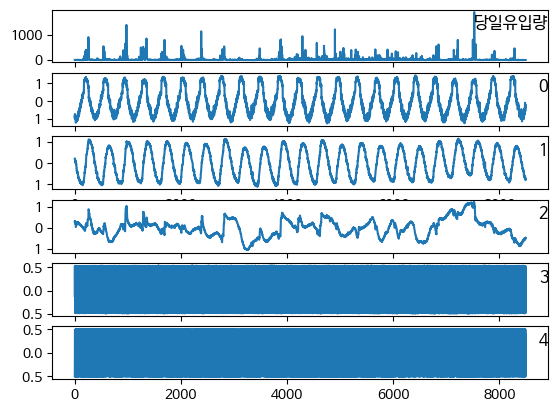

In [ ]:
# specify columns to plot
values = df.values
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(data=scaled_data, columns=df.columns, index=df.index.values)
df_scaled.head()

,당일유입량,0,1,2,3,4
2000-01-01,0.002319,0.132355,0.586387,0.594892,0.363177,0.008346
2000-01-02,0.002477,0.180977,0.575075,0.603064,0.800863,0.104846
2000-01-03,0.002003,0.113009,0.555992,0.595676,0.985874,0.501593
2000-01-04,0.003215,0.096922,0.562296,0.590214,0.792306,0.892094
2000-01-05,0.004217,0.143058,0.564440,0.593435,0.366162,0.984092


In [ ]:
df2 = df_scaled.copy()
num_lags = 3 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df2:
    for lag in range(1,num_lags+1):
        df2[column + '_lag' + str(lag)] = df2[column].shift(lag*-1-(delay-1))
        #if column != 'wnd_dir':
        df2[column + '_avg_window_length' + str(lag+1)] = df2[column].shift(-1-(delay-1)).rolling(window=lag+1,center=False).mean().shift(1-(lag+1))

df2.dropna(inplace=True) 

mask = (df2.columns.str.contains('당일유입량') | df2.columns.str.contains('lag') | df2.columns.str.contains('window'))
df_processed = df2[df2.columns[mask]]

# the columns in the processed dataframe
df_processed.columns

Index(['당일유입량', '당일유입량_lag1', '당일유입량_avg_window_length2', '당일유입량_lag2',
       '당일유입량_avg_window_length3', '당일유입량_lag3', '당일유입량_avg_window_length4',
       '0_lag1', '0_avg_window_length2', '0_lag2', '0_avg_window_length3',
       '0_lag3', '0_avg_window_length4', '1_lag1', '1_avg_window_length2',
       '1_lag2', '1_avg_window_length3', '1_lag3', '1_avg_window_length4',
       '2_lag1', '2_avg_window_length2', '2_lag2', '2_avg_window_length3',
       '2_lag3', '2_avg_window_length4', '3_lag1', '3_avg_window_length2',
       '3_lag2', '3_avg_window_length3', '3_lag3', '3_avg_window_length4',
       '4_lag1', '4_avg_window_length2', '4_lag2', '4_avg_window_length3',
       '4_lag3', '4_avg_window_length4'],
      dtype='object')

In [ ]:
mask = df_processed.columns.str.contains('당일유입량')
df_processed[df_processed.columns[mask]].head(10)

,당일유입량,당일유입량_lag1,당일유입량_avg_window_length2,당일유입량_lag2,당일유입량_avg_window_length3,당일유입량_lag3,당일유입량_avg_window_length4
2000-01-01,0.002319,0.002477,0.002240,0.002003,0.002565,0.003215,0.002978
2000-01-02,0.002477,0.002003,0.002609,0.003215,0.003145,0.004217,0.003202
2000-01-03,0.002003,0.003215,0.003716,0.004217,0.003602,0.003373,0.003479
2000-01-04,0.003215,0.004217,0.003795,0.003373,0.003566,0.003110,0.003255
2000-01-05,0.004217,0.003373,0.003241,0.003110,0.002934,0.002319,0.002912
2000-01-06,0.003373,0.003110,0.002714,0.002319,0.002758,0.002846,0.002490
2000-01-07,0.003110,0.002319,0.002583,0.002846,0.002284,0.001687,0.002609
2000-01-08,0.002319,0.002846,0.002266,0.001687,0.002706,0.003584,0.002899
2000-01-09,0.002846,0.001687,0.002635,0.003584,0.002916,0.003479,0.003097
2000-01-10,0.001687,0.003584,0.003531,0.003479,0.003566,0.003637,0.003452


In [ ]:
df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.8),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.8):,:]

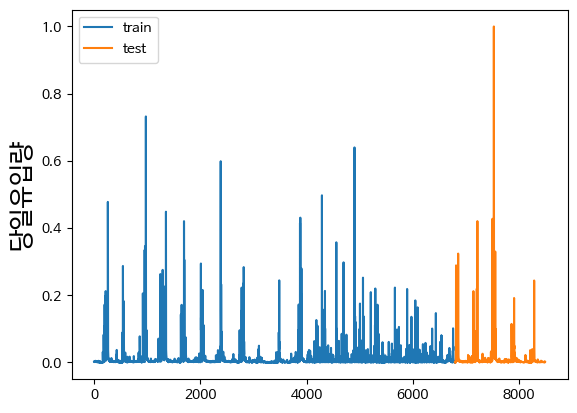

In [ ]:
plt.plot(df_train.index,df_train['당일유입량'])
plt.plot(df_test.index,df_test['당일유입량'])
plt.ylabel('당일유입량',fontsize=18)
plt.legend(['train','test'])
plt.show()

In [ ]:
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,51 mins 39 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_unknownUser_9oa9k2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.933 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
!npm install -g localtunnel -qq > /dev/null

In [ ]:
get_ipython().system_raw('lt --port 54321 >> url.txt 2>&1 &')

In [ ]:
!cat url.txt

your url is: https://tough-buttons-leave.loca.lt
your url is: https://thirty-heads-see.loca.lt
your url is: https://honest-rules-kick.loca.lt
your url is: https://bumpy-files-burn.loca.lt


In [ ]:
hf_train = h2o.H2OFrame(df_train)
hf_test = h2o.H2OFrame(df_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
hf_train.describe()

Rows:6793
Cols:37

,당일유입량,당일유입량_lag1,당일유입량_avg_window_length2,당일유입량_lag2,당일유입량_avg_window_length3,당일유입량_lag3,당일유입량_avg_window_length4,0_lag1,0_avg_window_length2,0_lag2,0_avg_window_length3,0_lag3,0_avg_window_length4,1_lag1,1_avg_window_length2,1_lag2,1_avg_window_length3,1_lag3,1_avg_window_length4,2_lag1,2_avg_window_length2,2_lag2,2_avg_window_length3,2_lag3,2_avg_window_length4,3_lag1,3_avg_window_length2,3_lag2,3_avg_window_length3,3_lag3,3_avg_window_length4,4_lag1,4_avg_window_length2,4_lag2,4_avg_window_length3,4_lag3,4_avg_window_length4
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007872402975672183,0.0,0.01849586959737985,0.0,0.020902767563274333,0.0,0.012847814955038034,0.0,0.013519405245070762,0.0,0.01451679389514901,0.0,0.00137390227789419,0.0,0.0026705016314275873,0.0,0.0025623786632042456,0.0008156613250555056,0.0031513955187569553,0.0008156613250555056,0.11961015271929716,0.0008156613250555056,0.17780207702720358,0.0,0.05059519202700136,0.0,0.12455244249785968,0.0,0.21738980839650096
mean,0.010694196424547614,0.01069402572787344,0.010693998571584325,0.010693971415295303,0.01069390158483774,0.010693707611344255,0.01069377938153686,0.4663831285758605,0.46643957329840274,0.46649601802094703,0.4665001908957884,0.4666214260905595,0.46656254392511265,0.47420750594636285,0.4742076713660805,0.47420783678579753,0.4742087622876831,0.4742109441308899,0.47421030116635876,0.44001353977903074,0.44000197742565894,0.4399904150722879,0.4399907301671022,0.4399682356499893,0.43997931036989596,0.4751461591831866,0.4751134314329281,0.47508070368266986,0.4750546194952203,0.4749369956198051,0.4749966011231194,0.4990752247283163,0.4991404365204786,0.49920564831264086,0.4991728277786209,0.4992376102949059,0.49916654279828276
maxs,0.7321983871817846,0.7321983871817846,0.5528645970589786,0.7321983871817846,0.39977863279397047,0.7321983871817846,0.3219179887208138,1.0,0.9921999973975522,1.0,0.989522811934612,1.0,0.9851948841634752,0.9956852326551756,0.9955654173280836,0.9956852326551756,0.9941562490112762,0.9956852326551756,0.9925266422405974,0.9199625278561674,0.91195256917014,0.9199625278561674,0.910384770164648,0.9199625278561674,0.9079588171421972,1.0,0.9017436329371016,1.0,0.8686062746777022,1.0,0.7437334098516326,1.0,0.950601928583642,1.0,0.8754552918714754,1.0,0.7838210587811413
sigma,0.03309181069078763,0.03309185688886718,0.028516837319935318,0.03309187067961787,0.026084514322192977,0.03309194711708685,0.02444581326321122,0.2903534208314754,0.28988844483567033,0.29039151343572256,0.2895166363983379,0.29042278254241366,0.2892181529890582,0.29847882411518645,0.29837008218476113,0.2984789371810907,0.29828861577780597,0.2984798985984665,0.2982144630528181,0.1569507095721135,0.15686695107271817,0.1569382543844788,0.1567815012337104,0.15692689471209248,0.15669138895133747,0.36200429903314374,0.32614753087647463,0.3619855942050432,0.2711272203312905,0.3619765565937043,0.2033493683104504,0.35460897388667595,0.3194960692671592,0.35462688375711865,0.26561493566129524,0.3546368830689549,0.1992219043723693
zeros,100,100,24,100,9,100,6,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.002319085015548411,0.002477204448426712,0.0022400252991092605,0.002002846149791809,0.002565048577803545,0.0032150951351921143,0.002977915985874664,0.18097735078608068,0.14699334790044413,0.11300934501480758,0.13030296671670552,0.09692220434922832,0.13349182929024578,0.5750754946710788,0.5655335929574843,0.5559916912438898,0.5644542544014607,0.5622955772894135,0.5644507961500707,0.6030643949838679,0.5993703595841144,0.595676324184361,0.5963182781427039,0.5902141152598828,0.5955974749176491,0.8008629482168428,0.8933686983268267,0.9858744484368108,0.8596810321486222,0.7923056997922133,0.7363013509214543,0.1

In [ ]:
y = '당일유입량'
X = hf_train.columns
X.remove(y)

In [ ]:
X

['당일유입량_lag1',
 '당일유입량_avg_window_length2',
 '당일유입량_lag2',
 '당일유입량_avg_window_length3',
 '당일유입량_lag3',
 '당일유입량_avg_window_length4',
 '0_lag1',
 '0_avg_window_length2',
 '0_lag2',
 '0_avg_window_length3',
 '0_lag3',
 '0_avg_window_length4',
 '1_lag1',
 '1_avg_window_length2',
 '1_lag2',
 '1_avg_window_length3',
 '1_lag3',
 '1_avg_window_length4',
 '2_lag1',
 '2_avg_window_length2',
 '2_lag2',
 '2_avg_window_length3',
 '2_lag3',
 '2_avg_window_length4',
 '3_lag1',
 '3_avg_window_length2',
 '3_lag2',
 '3_avg_window_length3',
 '3_lag3',
 '3_avg_window_length4',
 '4_lag1',
 '4_avg_window_length2',
 '4_lag2',
 '4_avg_window_length3',
 '4_lag3',
 '4_avg_window_length4']

In [ ]:
aml = H2OAutoML(max_runtime_secs = 300,
                seed = 42)
aml.train(x = X, 
          y = y,
          training_frame = hf_train,
          leaderboard_frame = hf_test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/3
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [ ]:
lb = aml.leaderboard

lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_4_20230528_14042,0.0292868,0.000857718,0.00744938,0.022705,0.000857718
StackedEnsemble_BestOfFamily_4_AutoML_4_20230528_14042,0.0297722,0.000886387,0.00813696,0.0235223,0.000886387
StackedEnsemble_AllModels_1_AutoML_4_20230528_14042,0.0298066,0.000888433,0.00799757,0.0234135,0.000888433
StackedEnsemble_BestOfFamily_5_AutoML_4_20230528_14042,0.029817,0.000889054,0.00845842,0.0235439,0.000889054
GBM_3_AutoML_4_20230528_14042,0.0298252,0.000889545,0.00823215,0.0233928,0.000889545
GBM_1_AutoML_4_20230528_14042,0.0298285,0.000889737,0.00733367,0.0230506,0.000889737
GBM_grid_1_AutoML_4_20230528_14042_model_6,0.0301351,0.000908125,0.00765159,0.0233351,0.000908125
GBM_grid_1_AutoML_4_20230528_14042_model_4,0.0301457,0.000908765,0.00954272,0.0240018,0.000908765
GBM_4_AutoML_4_20230528_14042,0.0301961,0.000911805,0.00864173,0.023854,0.000911805
DeepLearning_grid_3_AutoML_4_20230528_14042_model_1,0.0303152,0.00091901,0.00816847,0.0238507,0.00091901


In [ ]:
leader_model = aml.leader

In [ ]:
leader_model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/3
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [ ]:
hf_test_predict = leader_model.predict(hf_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
hf_test_predict.head(5)

predict
-0.00066146
0.00259918
0.00509665
0.00204193
0.00361847


In [ ]:
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['당일유입량'].reset_index(drop=True)
df_results['predictions'] = h2o.as_list(hf_test_predict,use_pandas=True)
df_results.head()

,ground_truth,predictions
0,0.001160,-0.000661
1,0.001160,0.002599
2,0.002108,0.005097
3,0.000211,0.002042
4,0.001212,0.003618


In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x=df_results['predictions'],y=df_results['ground_truth'])
print('R2 = ',r_value*r_value)

R2 =  0.47023231801338244


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error

rmse = np.sqrt(mean_squared_error(df_results['ground_truth'], df_results['predictions']))
print('RMSE:', rmse)

mae = mean_absolute_error(df_results['ground_truth'], df_results['predictions'])
print('MAE:', mae)

mse = mean_squared_error(df_results['ground_truth'], df_results['predictions'])
print("MSE:", mse)

RMSE: 0.02928682000982868
MAE: 0.007449381638846751
MSE: 0.0008577178262881017


In [ ]:
# PBIAS 계산
import numpy as np
diff = np.sum(df_results['predictions'] - df_results['ground_truth'])
sum_observed = np.sum(df_results['ground_truth'])
pbias = (diff / sum_observed) * 100

print('PBIAS:', pbias)

PBIAS: 19.545630747748106


In [ ]:
# NSE 계산
diff_pred_obs = np.sum((df_results['predictions'] - df_results['ground_truth']) ** 2)
diff_obs_mean = np.sum((df_results['ground_truth'] - np.mean(df_results['ground_truth'])) ** 2)
nse = 1 - (diff_pred_obs / diff_obs_mean)

print('NSE:', nse)

NSE: 0.46704146316234596


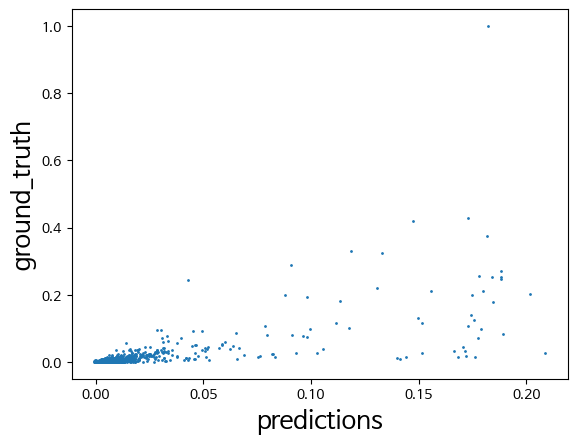

In [ ]:
plt.scatter(x=df_results['predictions'],y=df_results['ground_truth'],s=1)
plt.xlabel('predictions',fontsize=18)
plt.ylabel('ground_truth',fontsize=18)
plt.show()

In [ ]:
plt.rc('font', family='NanumBarunGothic')

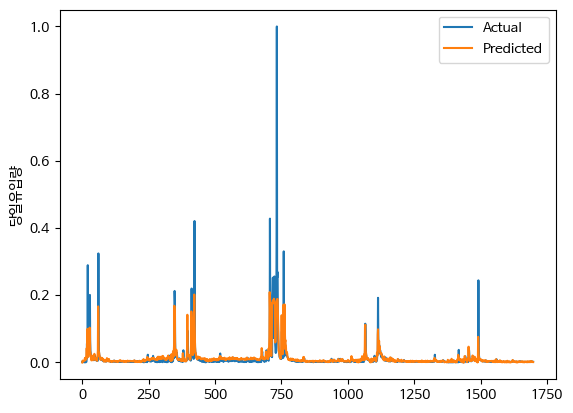

In [ ]:
plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions'])
plt.ylabel('당일유입량',fontsize=10)
plt.legend(['Actual','Predicted'])
#plt.rc('font', family='NanumBarunGothic')
plt.show()
